## 선형 로지스틱 회귀

<table class="tfo-notebook-buttons" align="left">
   <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/text/blob/master/docs/tutorials/text_classification_rnn.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense     # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers       # 케라스의 옵티마이저를 임포트

- 입력 벡터의 차원은 3입니다. 즉, input_dim은 3입니다.
- 출력 벡터의 차원은 1입니다. 즉, output_dim은 1입니다.

In [2]:
X=np.array([[70,85,11],[71,89,18],[50,80,20],[99,20,10],[50,10,10]])    # 중간, 기말, 가산점
y=np.array([73,82,72,57,34])                 # 최종 성적

In [3]:
X.shape

(5, 3)

In [4]:
model=Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))
sgd=optimizers.SGD(lr=0.0001)
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])

C:\Users\admin\anaconda3\envs\tf2-cpu\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [5]:
history = model.fit(X, y, epochs=30)

Epoch 1/30
1/1 [==============================] - 0s 197ms/step - loss: 21919.8711 - mse: 21919.8711
Epoch 2/30
1/1 [==============================] - 0s 2ms/step - loss: 11634.3809 - mse: 11634.3809
Epoch 3/30
1/1 [==============================] - 0s 2ms/step - loss: 6185.9961 - mse: 6185.9961
Epoch 4/30
1/1 [==============================] - 0s 3ms/step - loss: 3296.3823 - mse: 3296.3823
Epoch 5/30
1/1 [==============================] - 0s 3ms/step - loss: 1761.5121 - mse: 1761.5121
Epoch 6/30
1/1 [==============================] - 0s 3ms/step - loss: 944.6951 - mse: 944.6951
Epoch 7/30
1/1 [==============================] - 0s 2ms/step - loss: 508.9865 - mse: 508.9865
Epoch 8/30
1/1 [==============================] - 0s 2ms/step - loss: 275.8955 - mse: 275.8955
Epoch 9/30
1/1 [==============================] - 0s 2ms/step - loss: 150.7549 - mse: 150.7549
Epoch 10/30
1/1 [==============================] - 0s 2ms/step - loss: 83.2777 - mse: 83.2777
Epoch 11/30
1/1 [==================

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

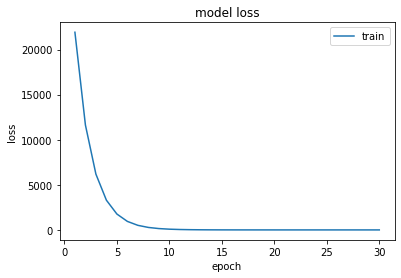

In [7]:
epochs = range(1, len(history.history['mse']) + 1)
plt.plot(epochs, history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'] )
plt.show()

In [8]:
import os
logdir = os.path.join(os.curdir, "logs")

In [9]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(logdir, run_id)

In [10]:
dir = get_run_logdir()
dir

'.\\logs\\run_2021_11_15-22_59_29'

In [11]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [13]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(logdir)
history = model.fit(X, y, epochs=30,
                    #validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
1/1 [==============================] - 0s 33ms/step - loss: 1.5180 - mse: 1.5180
Epoch 2/30
1/1 [==============================] - 0s 129ms/step - loss: 1.5070 - mse: 1.5070
Epoch 3/30
1/1 [==============================] - 0s 3ms/step - loss: 1.4964 - mse: 1.4964
Epoch 4/30
1/1 [==============================] - 0s 2ms/step - loss: 1.4861 - mse: 1.4861
Epoch 5/30
1/1 [==============================] - 0s 4ms/step - loss: 1.4760 - mse: 1.4760
Epoch 6/30
1/1 [==============================] - 0s 2ms/step - loss: 1.4660 - mse: 1.4660
Epoch 7/30
1/1 [==============================] - 0s 3ms/step - loss: 1.4562 - mse: 1.4562
Epoch 8/30
1/1 [==============================] - 0s 2ms/step - loss: 1.4465 - mse: 1.4465
Epoch 9/30
1/1 [==============================] - 0s 3ms/step - loss: 1.4368 - mse: 1.4368
Epoch 10/30
1/1 [==============================] - 0s 2ms/step - loss: 1.4273 - mse: 1.4273
Epoch 11/30
1/1 [==============================] - 0s 3ms/step - loss: 1.4178 - mse: 1

텐서보드 서버를 실행하는 한 가지 방법은 터미널에서 직접 실행하는 것입니다. 터미널을 열고 텐서보드가 설치된 가상 환경을 활성화합니다. 그다음 노트북 디렉토리로 이동하여 다음 명령을 입력하세요:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

그다음 웹 브라우저를 열고 [localhost:6006](http://localhost:6006)에 접속하면 텐서보드를 사용할 수 있습니다. 사용이 끝나면 터미널에서 Ctrl-C를 눌러 텐서보드 서버를 종료하세요.

또는 다음처럼 텐서보드의 주피터 확장을 사용할 수 있습니다(이 명령은 텐서보드가 로컬 컴퓨터에 설치되어 있어야 합니다):

In [14]:
%load_ext tensorboard
%tensorboard --logdir=./logs --port=6006